# Data Science Project - Loan Prediction Problem - Logistic Regression

## 1. Data Exploration

In [154]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [155]:
df = pd.read_csv('loan_dataset.csv')

In [156]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [158]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [159]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [160]:
for i in df.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1).columns:
    print(i + ':', df[i].unique())

Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Loan_Amount_Term: [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Credit_History: [ 1.  0. nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [161]:
df.apply(lambda x:sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

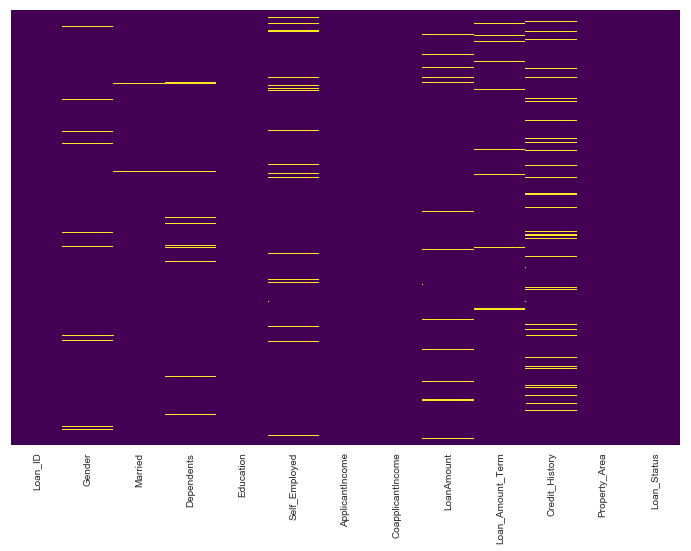

In [162]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

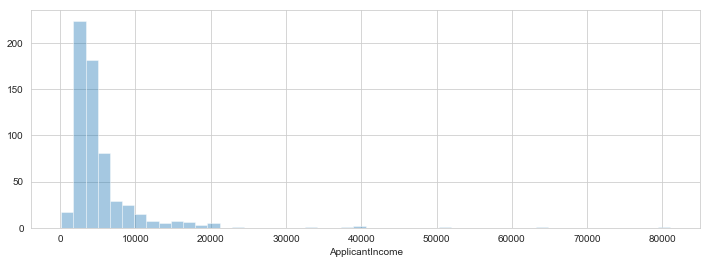

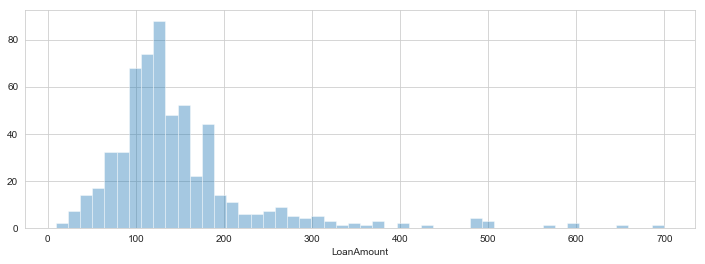

In [163]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
sns.distplot(df['ApplicantIncome'], bins=50, kde=False)
plt.figure(figsize=(12,4))
sns.distplot(df['LoanAmount'].dropna(), bins=50, kde = False)

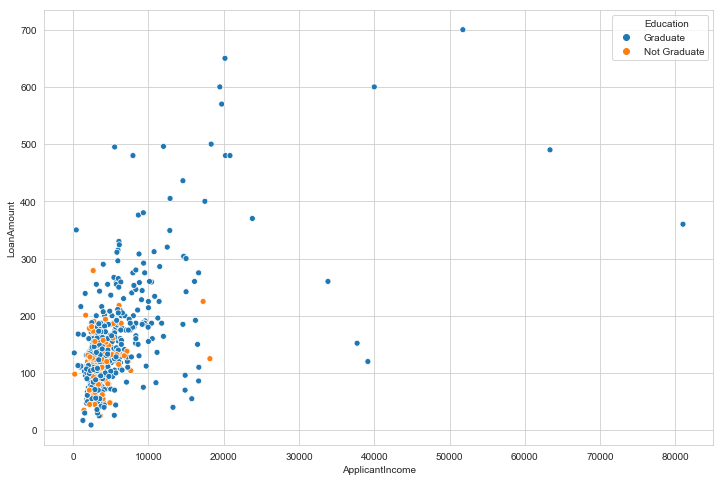

In [164]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Education', data=df)

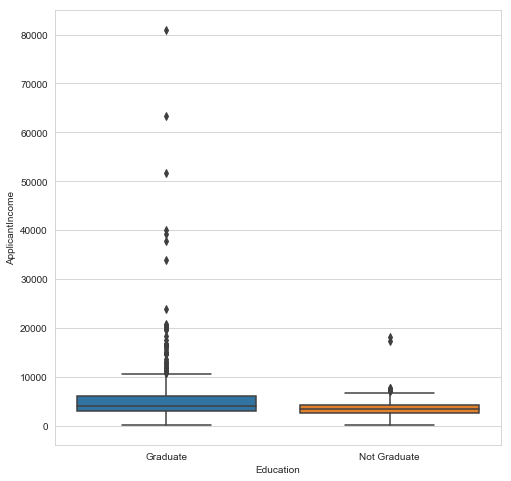

In [165]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Education', y='ApplicantIncome', data=df)

## 2. Data Cleaning

### 2.1. Missin Values

In [166]:
df[df['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


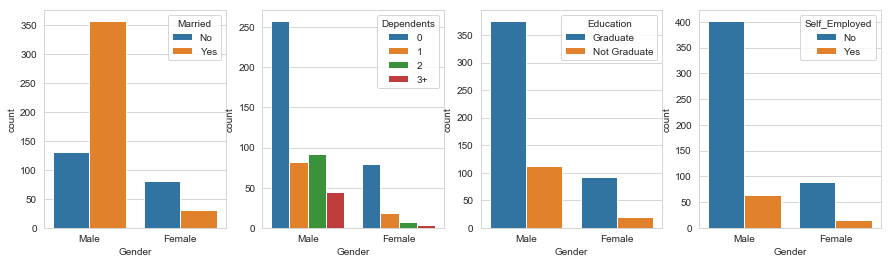

In [167]:
f = plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.countplot(x='Gender', data=df, hue='Married')
plt.subplot(1,4,2)
sns.countplot(x='Gender', data=df, hue='Dependents')
plt.subplot(1,4,3)
sns.countplot(x='Gender', data=df, hue='Education')
plt.subplot(1,4,4)
sns.countplot(x='Gender', data=df, hue='Self_Employed')

#### Plots from 2 to 4 has same proportion both for males and females, but plot one gives as observation that there's about 350 married males and only around 25 married femals. We have 13 NaN for 'Gender' column so can assume that if NaN is married we take it as a Male, otherwise we will inplace NaN with 50:50 ratio - there is about 125 unmarried males and 75 females

In [168]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [169]:
df['Gender'].value_counts().apply(lambda x: x/601)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [170]:
def impute_gender(cols):
    gender = cols[0]
    married = cols[1]
    
    if pd.isnull(gender):
        
        if married == "Yes":
            return "Male"
        
        else:
            rnd = random.random()
            if rnd < 0.5:
                return "Male"
            elif rnd >= 0.5:
                return "Female"
    else:
        return gender
        
        

In [171]:
df['Gender'] = df[['Gender', 'Married']].apply(impute_gender, axis=1) 

In [172]:
df['Gender'].isnull().sum()

0

In [173]:
df[df['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


#### The other way up we have 3 NaN's in 'Married' column and as we said before, there is much more probably that male is married and that female is not. So we will impute two NaN's of males with 'Yes' and the one for female with "No"

In [174]:
def impute_married(cols):
    married = cols[0]
    gender = cols[1]
    
    if pd.isnull(married):
        if gender == 'Male':
            return "Yes"
        else:
            return "No"
    else:
        return married

In [175]:
df['Married'] = df[['Married', 'Gender']].apply(impute_married, axis=1) 

In [176]:
df['Married'].isnull().sum()

0

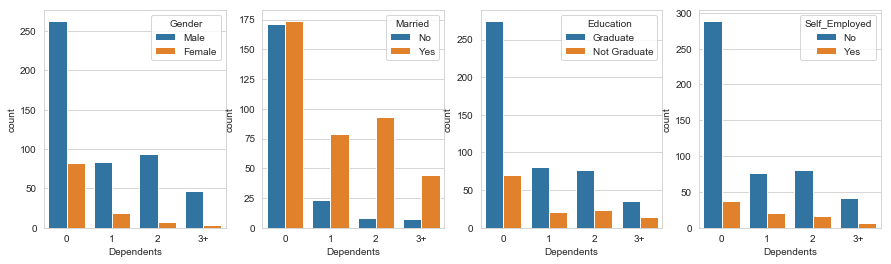

In [177]:
f = plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.countplot(x='Dependents', data=df, hue='Gender')
plt.subplot(1,4,2)
sns.countplot(x='Dependents', data=df, hue='Married')
plt.subplot(1,4,3)
sns.countplot(x='Dependents', data=df, hue='Education')
plt.subplot(1,4,4)
sns.countplot(x='Dependents', data=df, hue='Self_Employed')

In [178]:
df[df['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [179]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

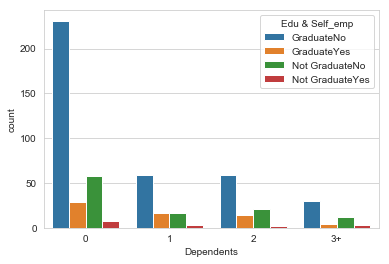

In [180]:
df['Edu & Self_emp'] = df['Education'] + df['Self_Employed']
sns.countplot(x='Dependents', data=df, hue='Edu & Self_emp')

#### We have 4 combinations of graduate / not graduate - self-employed / not self-employed and we will impute 'Dependents' NaN depending on which combiantion occures in specific row.

In [181]:
def impute_dep(cols):
    dependents = cols[0]
    edsemp = cols[1]
    values = ['0', '1', '2', '3+']
    
    if pd.isnull(dependents):
        if edsemp == 'GraduateNo':
            return '0'
        else:
            return values[int(np.floor(4 * random.random()))]
    else:
        return dependents

In [182]:
df['Dependents'] = df[['Dependents', 'Edu & Self_emp']].apply(impute_dep, axis=1) 

In [183]:
df['Dependents'].isnull().sum()

0

In [184]:
df = df.drop(columns='Edu & Self_emp', axis=1)

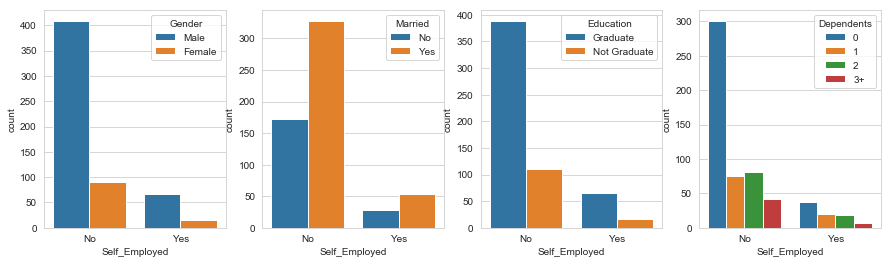

In [185]:
f = plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.countplot(x='Self_Employed', data=df, hue='Gender')
plt.subplot(1,4,2)
sns.countplot(x='Self_Employed', data=df, hue='Married')
plt.subplot(1,4,3)
sns.countplot(x='Self_Employed', data=df, hue='Education')
plt.subplot(1,4,4)
sns.countplot(x='Self_Employed', data=df, hue='Dependents')

In [186]:
df['Self_Employed'].value_counts()/582

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [187]:
def impute_self_emp(col):
    self_emp = col
    
    if pd.isnull(self_emp):
        rnd=random.random()
        if rnd < 0.86:
            return 'No'
        else:
            return 'Yes'
    else:
        return self_emp

In [188]:
df['Self_Employed'] = df['Self_Employed'].apply(impute_self_emp)

In [189]:
df['Self_Employed'].isnull().sum()

0

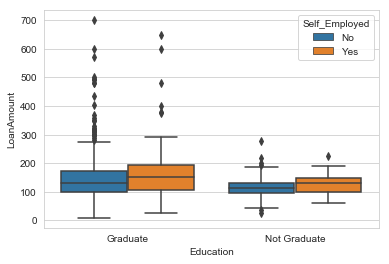

In [190]:
sns.boxplot(x='Education', y='LoanAmount', data=df, hue='Self_Employed')

In [191]:
df.pivot_table(values='LoanAmount',index='Education', columns='Self_Employed' ,aggfunc=lambda x: x.median())

Self_Employed,No,Yes
Education,,
Graduate,130.0,151.0
Not Graduate,113.0,130.0


In [192]:
def impute_loan_amount(cols):
    loan_amount = cols[0]
    edu = cols[1]
    semp = cols[2]
    
    if pd.isnull(loan_amount):
        if edu == "Graduate" and semp == "Yes":
            return 157.5
        elif edu == "Not Graduate" and semp == "No":
            return 113.0
        else:
            return 130.0
    else:
        return loan_amount

In [193]:
df['LoanAmount'] = df[['LoanAmount', 'Education', 'Self_Employed']].apply(impute_loan_amount, axis=1)

In [194]:
df['LoanAmount'].isnull().sum()

0

In [195]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [196]:
df['Credit_History'].value_counts()/(475+89)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [197]:
def impute_credit_history(col):
    cr_hist = col
    
    if pd.isnull(cr_hist):
        if random.random() < 0.85:
            return 1
        else:
            return 0
    else:
        return cr_hist

In [198]:
df['Credit_History'] = df['Credit_History'].apply(impute_credit_history)

In [199]:
df['Credit_History'].isnull().sum()

0

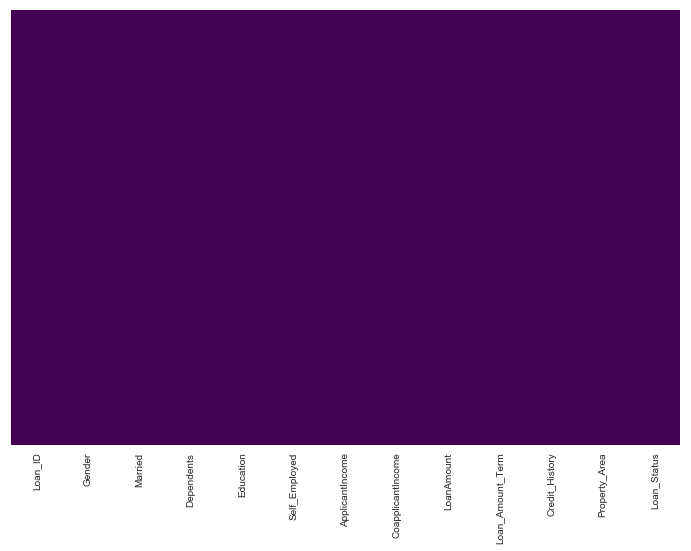

In [200]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## 2.2. Extreme values treatment and caterogical features converting

In [201]:
#i did a big mess here. I shouldn't add this columns, because I will use new data frame for regression, but I will leave it here
df['Sum_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['ratio'] = df['LoanAmount']/df['Sum_Income']
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmountTerm_log']=np.log(df['Loan_Amount_Term'])
df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])
df['Sum_Income_log']= np.log(df['Sum_Income'])
df['ratio_log']=df['LoanAmount_log']/df['Sum_Income_log']

df[['ApplicantIncome', 'ApplicantIncome_log', 'Sum_Income', 'Sum_Income_log', 'LoanAmount', 'LoanAmount_log', 'Loan_Amount_Term', 'LoanAmountTerm_log', 'ratio', 'ratio_log']].describe()

,ApplicantIncome,ApplicantIncome_log,Sum_Income,Sum_Income_log,LoanAmount,LoanAmount_log,Loan_Amount_Term,LoanAmountTerm_log,ratio,ratio_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,8.341213,7024.705081,8.669414,145.764658,4.857146,342.410423,5.803234,0.023868,0.560066
std,6109.041673,0.645263,6458.663872,0.545102,84.145700,0.496392,64.428629,0.312699,0.008668,0.042743
min,150.000000,5.010635,1442.000000,7.273786,9.000000,2.197225,12.000000,2.484907,0.002523,0.282637
25%,2877.500000,7.964677,4166.000000,8.334712,100.250000,4.607658,360.000000,5.886104,0.019202,0.544411
50%,3812.500000,8.246040,5416.500000,8.597205,128.000000,4.852030,360.000000,5.886104,0.024069,0.565018
75%,5795.000000,8.664750,7521.750000,8.925549,164.750000,5.104426,360.000000,5.886104,0.028233,0.582916
max,81000.000000,11.302204,81000.000000,11.302204,700.000000,6.551080,480.000000,6.173786,0.082712,0.689756


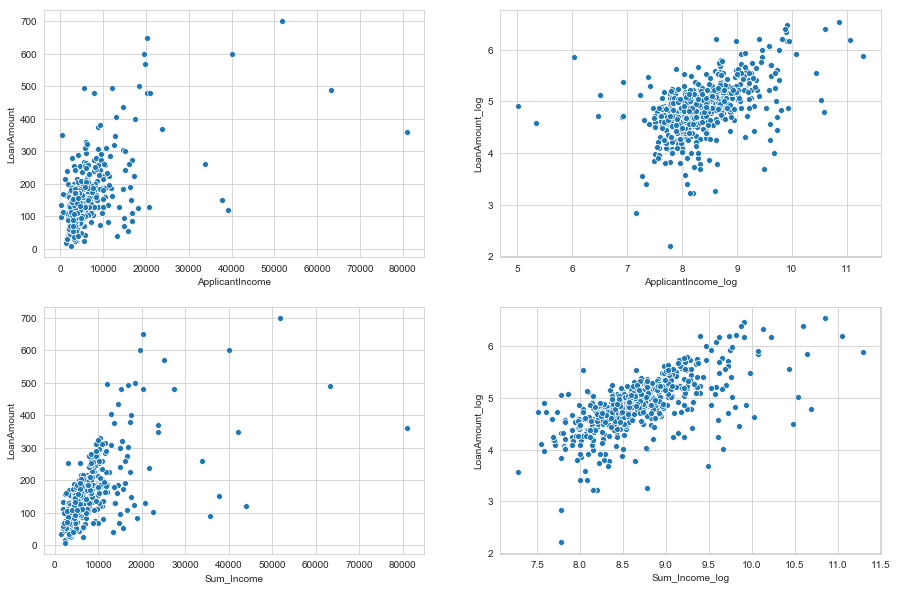

In [202]:
f = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x='ApplicantIncome',y='LoanAmount', data=df)
plt.subplot(2,2,2)
sns.scatterplot(x='ApplicantIncome_log',y='LoanAmount_log', data=df)
plt.subplot(2,2,3)
sns.scatterplot(x='Sum_Income',y='LoanAmount', data=df)
plt.subplot(2,2,4)
sns.scatterplot(x='Sum_Income_log',y='LoanAmount_log', data=df)

In [203]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Sum_Income,ratio,LoanAmount_log,LoanAmountTerm_log,ApplicantIncome_log,Sum_Income_log,ratio_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,5849.0,0.022226,4.867534,5.886104,8.674026,8.674026,0.561162
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.021015,4.852030,5.886104,8.430109,8.714568,0.556772
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.022000,4.189655,5.886104,8.006368,8.006368,0.523290
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.024287,4.787492,5.886104,7.856707,8.505323,0.562882
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.023500,4.948760,5.886104,8.699515,8.699515,0.568855


In [204]:
gender = pd.get_dummies(df['Gender'], drop_first=True)
married = pd.get_dummies(df['Married'].map({'No':'Unmarried','Yes':'Married'}), drop_first=True)
dependents= df['Dependents'].map({'0':0,'1':1, '2':2, '3+':3})
education = pd.get_dummies(df['Education'], drop_first=True)
self_employed = pd.get_dummies(df['Self_Employed'].map({'No':'Employed','Yes':'Self_Employed'}), drop_first=True)
property_area = pd.get_dummies(df['Property_Area'], drop_first=True)


In [427]:
cleaned_df = pd.DataFrame()
cleaned_df = pd.concat([gender, married, dependents, education, self_employed, property_area, df['Credit_History']], axis=1)
cleaned_df['LoanAmount_log']=np.log(df['LoanAmount'])
cleaned_df['LoanAmountTerm_log']=np.log(df['Loan_Amount_Term'])
cleaned_df['Sum_Income_log']= np.log(df['Sum_Income'])
#cleaned_df['ratio_log']=df['LoanAmount_log']/df['Sum_Income_log']
cleaned_df['Loan_Status'] = pd.get_dummies(df['Loan_Status'],drop_first=True)

cleaned_df2 = pd.DataFrame()
cleaned_df2 = pd.concat([gender, married, dependents, education, self_employed, df[['Credit_History' 'Loan_Status']]], axis=1)
# cleaned_df2['LoanAmount_log']=np.log(df[])
# cleaned_df2['LoanAmountTerm_log']=np.log(df['Loan_Amount_Term'])
# cleaned_df2['Sum_Income_log']= np.log(df['Sum_Income'])
# cleaned_df2['ratio_log']=df['LoanAmount_log']/df['Sum_Income_log']
# cleaned_df2['Loan_Status'] = pd.get_dummies(df['Loan_Status'],drop_first=True)

In [231]:
cleaned_df.head(10)

,Male,Unmarried,Dependents,Not Graduate,Self_Employed,Semiurban,Urban,Credit_History,LoanAmount_log,LoanAmountTerm_log,Sum_Income_log,ratio_log,Loan_Status
0,1,1,0,0,0,0,1,1.0,4.867534,5.886104,8.674026,0.561162,1
1,1,0,1,0,0,0,0,1.0,4.852030,5.886104,8.714568,0.556772,0
2,1,0,0,0,1,0,1,1.0,4.189655,5.886104,8.006368,0.523290,1
3,1,0,0,1,0,0,1,1.0,4.787492,5.886104,8.505323,0.562882,1
4,1,1,0,0,0,0,1,1.0,4.948760,5.886104,8.699515,0.568855,1
5,1,0,2,0,1,0,1,1.0,5.587249,5.886104,9.170872,0.609239,1
6,1,0,0,1,0,0,1,1.0,4.553877,5.886104,8.255569,0.551613,1
7,1,0,3,0,0,1,0,0.0,5.062595,5.886104,8.619750,0.587325,0
8,1,0,2,0,0,0,1,1.0,5.123964,5.886104,8.618305,0.594544,1
9,1,0,1,0,0,1,0,1.0,5.855072,5.886104,10.077819,0.580986,0


In [208]:
cleaned_df.describe()

,Male,Unmarried,Dependents,Not Graduate,Self_Employed,Semiurban,Urban,Credit_History,LoanAmount_log,LoanAmountTerm_log,Sum_Income_log,ratio_log,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.812704,0.348534,0.754072,0.218241,0.146580,0.379479,0.328990,0.843648,4.857146,5.803234,8.669414,0.560066,0.312704
std,0.390467,0.476895,1.012052,0.413389,0.353975,0.485653,0.470229,0.363485,0.496392,0.312699,0.545102,0.042743,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,2.484907,7.273786,0.282637,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.607658,5.886104,8.334712,0.544411,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.852030,5.886104,8.597205,0.565018,0.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.104426,5.886104,8.925549,0.582916,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.551080,6.173786,11.302204,0.689756,1.000000


## 3. Data modeling

## 3.1. Train/Test sets split

In [341]:
from sklearn.model_selection import train_test_split

In [428]:
X = cleaned_df.drop('Loan_Status', axis=1)
y = cleaned_df['Loan_Status']

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 3.2. Training

In [430]:
from sklearn.linear_model import LogisticRegression

In [431]:
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)

log_regression2 = LogisticRegression()
log_regression2.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 3.3. Predicting

In [432]:
predictions =log_regression.predict(X_test)
predictions2 =log_regression2.predict(X2_test)

## 3.4. Evaluation

In [433]:
from sklearn.metrics import classification_report, confusion_matrix

In [434]:
print(confusion_matrix(y_test, predictions))
print(confusion_matrix(y2_test, predictions2))

[[ 26  29]
 [  5 125]]
[[ 20  27]
 [  6 132]]


In [435]:
print(classification_report(y_test, predictions))
print(classification_report(y2_test, predictions2))

             precision    recall  f1-score   support

          0       0.84      0.47      0.60        55
          1       0.81      0.96      0.88       130

avg / total       0.82      0.82      0.80       185

             precision    recall  f1-score   support

          N       0.77      0.43      0.55        47
          Y       0.83      0.96      0.89       138

avg / total       0.81      0.82      0.80       185



In [360]:
from sklearn.metrics import accuracy_score
metrics.accuracy_score(predi)